In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
N = 101 #Number of points
lb = -10 #Lower bound
ub = 10 #Upper bound
n = N-1 #Number of points minus 1, useful for indexing
dn = n/ub #Points per unit length

X = np.linspace(lb,ub,N)
x,y = np.meshgrid(X,X)
a = 2.25
f = 1

useNorm = False #Use normalized arrows on quiver plot

threshold = 0 #Threshold for where to set A,B = 0

In [3]:
def computeA(x,y,a,f):
    #if (x == a) and (y == 0):
    #    return 0
    #else:
        return f*np.log(np.sqrt(pow(x-a,2)+pow(y,2))) + np.log(np.sqrt(pow(x+a,2)+pow(y,2)))

def computeBx(x,y,a,f):
    #if (x == a) and (y == 0):
    #    return 0
    #else:
        return y*((f/(pow(x-a,2)+pow(y,2)))+(1/(pow(x+a,2)+pow(y,2))))

def computeBy(x,y,a,f):
    #if (x == a) and (y == 0):
    #    return 0
    #else:
        return -(((f*(x-a))/(pow(x-a,2)+pow(y,2)))+((x+a)/(pow(x+a,2)+pow(y,2))))
    
def computeAll(x,y,a,f,n,N,func,xMin,yMin,threshold):
    v = np.zeros([x.shape[0],y.shape[0]])
    for i in np.linspace(0,n,N,dtype='int'):
        for j in np.linspace(0,n,N,dtype='int'):
            if (abs(x[i,j] - a) < xMin + threshold) and (abs(y[i,j]) < yMin + threshold):
                v[i,j] = 0
            else:
                v[i,j] = func(x[i,j],y[i,j],a,f)
    return v

def normalize(x,y):
    x /= np.sqrt(x**2 + y**2)
    y /= np.sqrt(x**2 + y**2)
    return x,y

def findClosestGridPoint(a,X,n):
    dOld = np.abs(X[0] - a)
    d = dOld
    for i in np.linspace(1,n,n,dtype='int'):
        dNew = np.abs(X[i] - a)
        if dNew < dOld:
            d = dNew
        dOld = dNew
    return d       

def symlog(x):
    return np.sign(x) * np.log10(np.abs(x))

In [4]:

xMin = findClosestGridPoint(a,X,n)
yMin = 1/dn

tA = computeAll(x,y,a,f,n,N,computeA,xMin,yMin,threshold) #Reconnection vector potential
rA = computeAll(x,y,a,-f,n,N,computeA,xMin,yMin,threshold) #Closed field vector potential

tBx = computeAll(x,y,a,f,n,N,computeBx,xMin,yMin,threshold)
tBy = computeAll(x,y,a,f,n,N,computeBy,xMin,yMin,threshold)

rBx = computeAll(x,y,a,-f,n,N,computeBx,xMin,yMin,threshold)
rBy = computeAll(x,y,a,-f,n,N,computeBy,xMin,yMin,threshold)


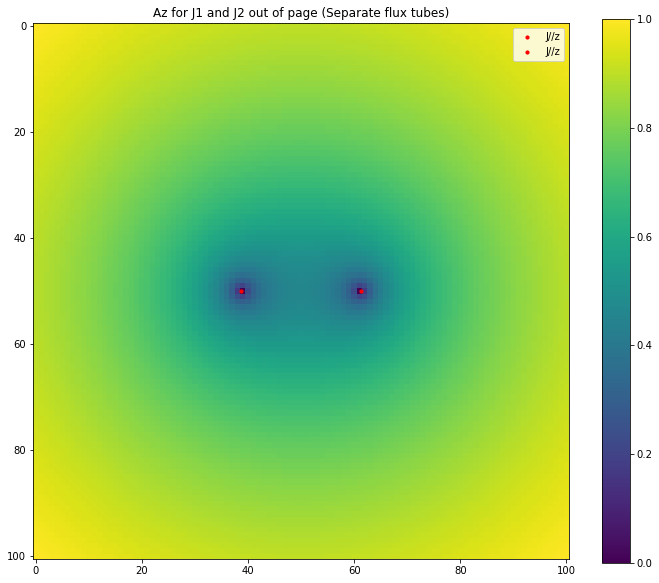

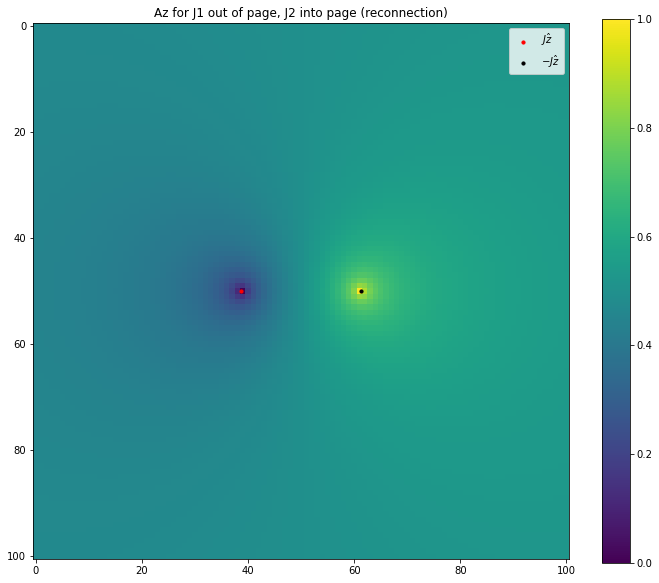

In [8]:
size = 10 #Size of points that denote wire locations

plt.figure(1,figsize=(12,10))
plt.title('Az for J1 and J2 out of page (Separate flux tubes)')
plt.imshow(tA/np.max(tA))
plt.scatter((-a*dn)/2+n/2,n/2,c='r',s=size,label=r'$J\hat{z}$')
plt.scatter((a*dn)/2+n/2,n/2,c='r',s=size,label=r'$J\hat{z}$')
plt.colorbar()
plt.legend()

plt.figure(2,figsize=(12,10))
plt.title('Az for J1 out of page, J2 into page (reconnection)')
plt.imshow(rA/np.max(rA))
plt.scatter((-a*dn)/2+n/2,n/2,c='r',s=size,label=r'$J\hat{z}$')
plt.scatter((a*dn)/2+n/2,n/2,c='black',s=size,label=r'-$J\hat{z}$')
plt.colorbar()
plt.legend()

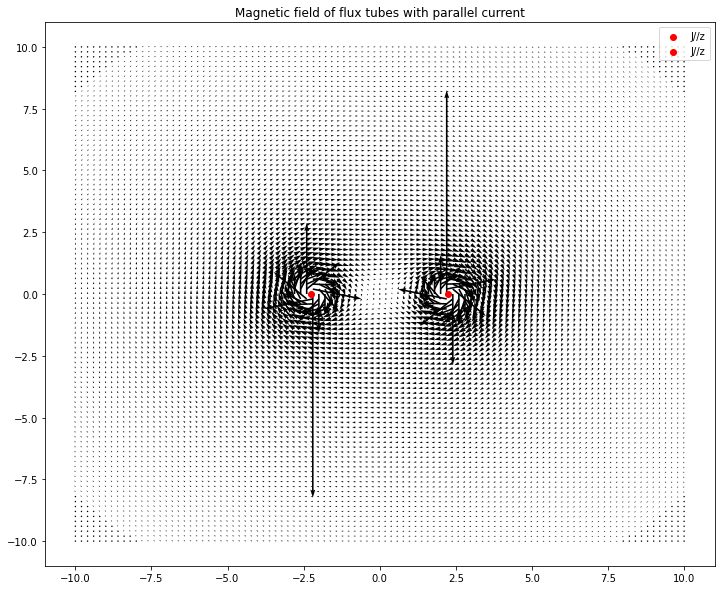

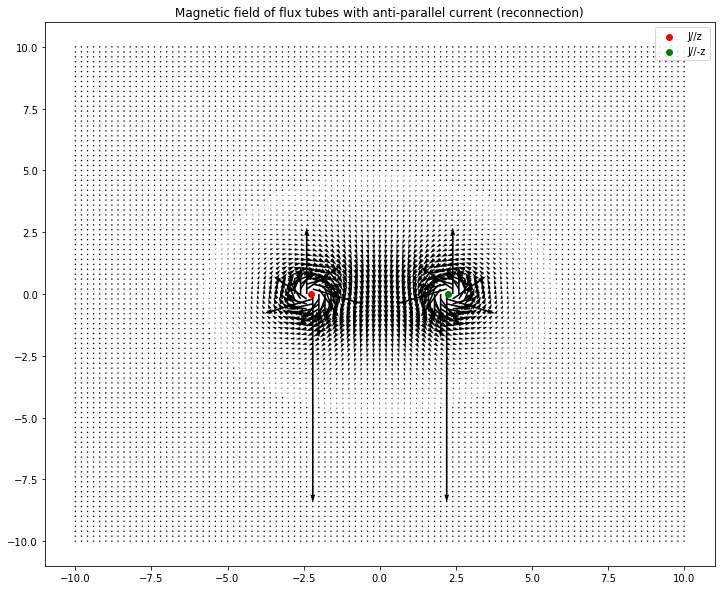

In [6]:
Scale = 65

if useNorm == True:
    tBx,tBy = normalize(tBx,tBy)
    rBx,rBy = normalize(rBx,rBy)

plt.figure(1,figsize=(12,10))
plt.quiver(x,y,tBx,tBy,scale=Scale)
plt.scatter(-a,0,c='r',label=r'$J\hat{z}$')
plt.scatter(a,0,c='r',label=r'$J\hat{z}$')
if useNorm == True:
    plt.title('Normalized magnetic field of flux tubes with parallel current')
else:
    plt.title('Magnetic field of flux tubes with parallel current')
plt.legend()

plt.figure(2,figsize=(12,10))
plt.quiver(x,y,rBx,rBy,scale=Scale)
plt.scatter(-a,0,c='r',label=r'$J\hat{z}$')
plt.scatter(a,0,c='green',label=r'$-J\hat{z}$')
if useNorm:
    plt.title('Normalized magnetic field of flux tubes with anti-parallel current (reconnection)')
else:
    plt.title('Magnetic field of flux tubes with anti-parallel current (reconnection)')
plt.legend()